In [13]:
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
import os
import numpy as np

In [2]:
# function for making imbalanced dataset
def make_imbalanced_dataset(data, labels, proportion, random_state=0):
    # fix the random seed
    np.random.seed(random_state)
    # download input data and labels into the DataFrame
    dataset = pd.DataFrame(data)
    dataset['label'] = labels
    # get unique labels (class "names")
    unique_labels = dataset.label.unique()
    num_labels = []
    # get number of examples for each class
    for label in unique_labels:
        num_labels.append(dataset.loc[dataset['label'] == label].shape[0])
    # get the label of class which will be imbalanced
    label_to_cut = num_labels.index(min(num_labels))
    # count number of examples after make it imbalanced
    num_imbalanced_label = int(round(proportion * (sum(num_labels) - min(num_labels)) / (1 - proportion), 0))
    # 
    inds_set = {int(dataset.loc[dataset['label'] == label_to_cut].shape[0] * np.random.random())}
    while len(inds_set) < num_imbalanced_label:
        inds_set.add(int(dataset.loc[dataset['label'] == label_to_cut].shape[0] * np.random.random()))
    inds_list = list(inds_set)
    class_to_cut = dataset.loc[dataset['label'] == label_to_cut]
    imbalanced_dataset = class_to_cut.iloc[inds_list]
    for label in unique_labels:
        if label != label_to_cut:
            imbalanced_dataset = imbalanced_dataset.append(dataset.loc[dataset['label'] == label])
    imbalanced_dataset = imbalanced_dataset.sample(frac=1, random_state=random_state) 
    return imbalanced_dataset

In [3]:
# os.mkdir('imbalanced_datasets')


In [4]:
% cd ./imbalanced_datasets
bc = datasets.load_breast_cancer()
imbalanced_cancer = make_imbalanced_dataset(bc.data, bc.target, 0.05)
columns =bc.feature_names
columns = np.append(columns, 'label')
imbalanced_cancer.columns = columns
imbalanced_cancer.head()

C:\Users\User\Desktop\Masters\FoML\coursework\project\imbalanced_datasets


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
217,10.200,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.01071,0.1964,0.06315,...,24.47,75.40,403.7,0.09527,0.13970,0.19250,0.03571,0.2868,0.07809,1
466,13.140,20.74,85.98,536.9,0.08675,0.10890,0.10850,0.03510,0.1562,0.06020,...,25.46,100.90,689.1,0.13510,0.35490,0.45040,0.11810,0.2563,0.08174,1
484,15.730,11.28,102.80,747.2,0.10430,0.12990,0.11910,0.06211,0.1784,0.06259,...,14.20,112.50,854.3,0.15410,0.29790,0.40040,0.14520,0.2557,0.08181,1
553,9.333,21.94,59.01,264.0,0.09240,0.05605,0.03996,0.01282,0.1692,0.06576,...,25.05,62.86,295.8,0.11030,0.08298,0.07993,0.02564,0.2435,0.07393,1
342,11.060,14.96,71.49,373.9,0.10330,0.09097,0.05397,0.03341,0.1776,0.06907,...,19.90,79.76,440.0,0.14180,0.22100,0.22990,0.10750,0.3301,0.09080,1


In [5]:
print "Number of type 0:", imbalanced_cancer.loc[imbalanced_cancer['label'] == 0].shape[0]
print "Number of type 1:", imbalanced_cancer.loc[imbalanced_cancer['label'] == 1].shape[0]

Number of type 0: 19
Number of type 1: 357


In [6]:
imbalanced_cancer.to_csv('imbalanced_breast_cancer.csv', index=False)
check_df = pd.read_csv('imbalanced_breast_cancer.csv')
check_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,10.200,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.01071,0.1964,0.06315,...,24.47,75.40,403.7,0.09527,0.13970,0.19250,0.03571,0.2868,0.07809,1
1,13.140,20.74,85.98,536.9,0.08675,0.10890,0.10850,0.03510,0.1562,0.06020,...,25.46,100.90,689.1,0.13510,0.35490,0.45040,0.11810,0.2563,0.08174,1
2,15.730,11.28,102.80,747.2,0.10430,0.12990,0.11910,0.06211,0.1784,0.06259,...,14.20,112.50,854.3,0.15410,0.29790,0.40040,0.14520,0.2557,0.08181,1
3,9.333,21.94,59.01,264.0,0.09240,0.05605,0.03996,0.01282,0.1692,0.06576,...,25.05,62.86,295.8,0.11030,0.08298,0.07993,0.02564,0.2435,0.07393,1
4,11.060,14.96,71.49,373.9,0.10330,0.09097,0.05397,0.03341,0.1776,0.06907,...,19.90,79.76,440.0,0.14180,0.22100,0.22990,0.10750,0.3301,0.09080,1


In [7]:
iris = datasets.load_iris()
imbalanced_iris = make_imbalanced_dataset(iris.data, iris.target, 0.05)
imbalanced_iris.head()

,0,1,2,3,label
71,6.1,2.8,4.0,1.3,1
106,4.9,2.5,4.5,1.7,2
27,5.2,3.5,1.5,0.2,0
107,7.3,2.9,6.3,1.8,2
130,7.4,2.8,6.1,1.9,2


In [8]:
imbalanced_iris.to_csv('imbalanced_iris.csv', index=False)
check_df = pd.read_csv('imbalanced_iris.csv')
check_df.head()

,0,1,2,3,label
0,6.1,2.8,4.0,1.3,1
1,4.9,2.5,4.5,1.7,2
2,5.2,3.5,1.5,0.2,0
3,7.3,2.9,6.3,1.8,2
4,7.4,2.8,6.1,1.9,2


In [9]:
wine = datasets.load_wine()
imbalanced_wine = make_imbalanced_dataset(wine.data, wine.target, 0.05)
imbalanced_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
19,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
79,12.70,3.87,2.40,23.0,101.0,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463.0,1
71,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0,1
36,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0,0


In [10]:
imbalanced_wine.to_csv('imbalanced_wine.csv', index=False)
check_df = pd.read_csv('imbalanced_wine.csv')
check_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,12.70,3.87,2.40,23.0,101.0,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463.0,1
3,13.86,1.51,2.67,25.0,86.0,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410.0,1
4,13.28,1.64,2.84,15.5,110.0,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880.0,0


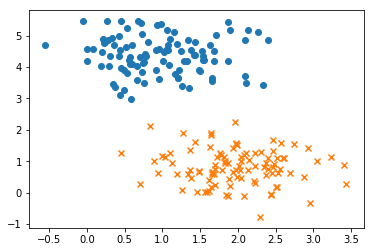

In [31]:
X, y = datasets.make_blobs(n_features=2, n_samples=200, centers=2, cluster_std=0.6 , random_state=0)
blobs = pd.DataFrame(X)
blobs.columns = ['x1', 'x2']
blobs['label'] = y
blobs.head()

label_0 = blobs.loc[blobs['label'] == 0]
label_1 = blobs.loc[blobs['label'] == 1]
plt.scatter(label_0.x1, label_0.x2, marker='o')
plt.scatter(label_1.x1, label_1.x2, marker='x')

(11, 3)


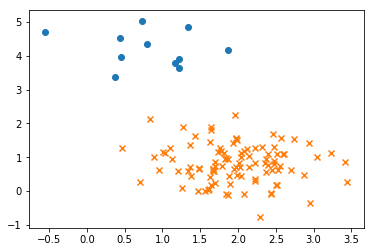

In [34]:
imbalanced_blobs = make_imbalanced_dataset(X, y, 0.1)
imbalanced_blobs.columns = ['x1', 'x2', 'label']
label_0 = imbalanced_blobs.loc[imbalanced_blobs['label'] == 0]
print label_0.shape
label_1 = imbalanced_blobs.loc[imbalanced_blobs['label'] == 1]
plt.scatter(label_0.x1, label_0.x2, marker='o')
plt.scatter(label_1.x1, label_1.x2, marker='x')
imbalanced_wine.to_csv('imbalanced_blobs.csv', index=False)